In [149]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

In [181]:
path = r'/Users/gauravvattikuti/Documents/VSCode/poker_app/data/Silver/game_data.csv'

In [182]:
df_raw = pd.read_csv(path, header = 0) #, names = cols)

df_raw.replace(0, np.nan, inplace = True)

In [183]:
df_raw['Game'] = df_raw.reset_index(drop=True).index + 1
# df_raw

/var/folders/7j/qcm64r196nx85pphcp9979y80000gn/T/ipykernel_35779/1193975772.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_long, x='Player', y='Amount', order=order_by_median, palette='pastel', flierprops=dict(marker='x', markersize=8))


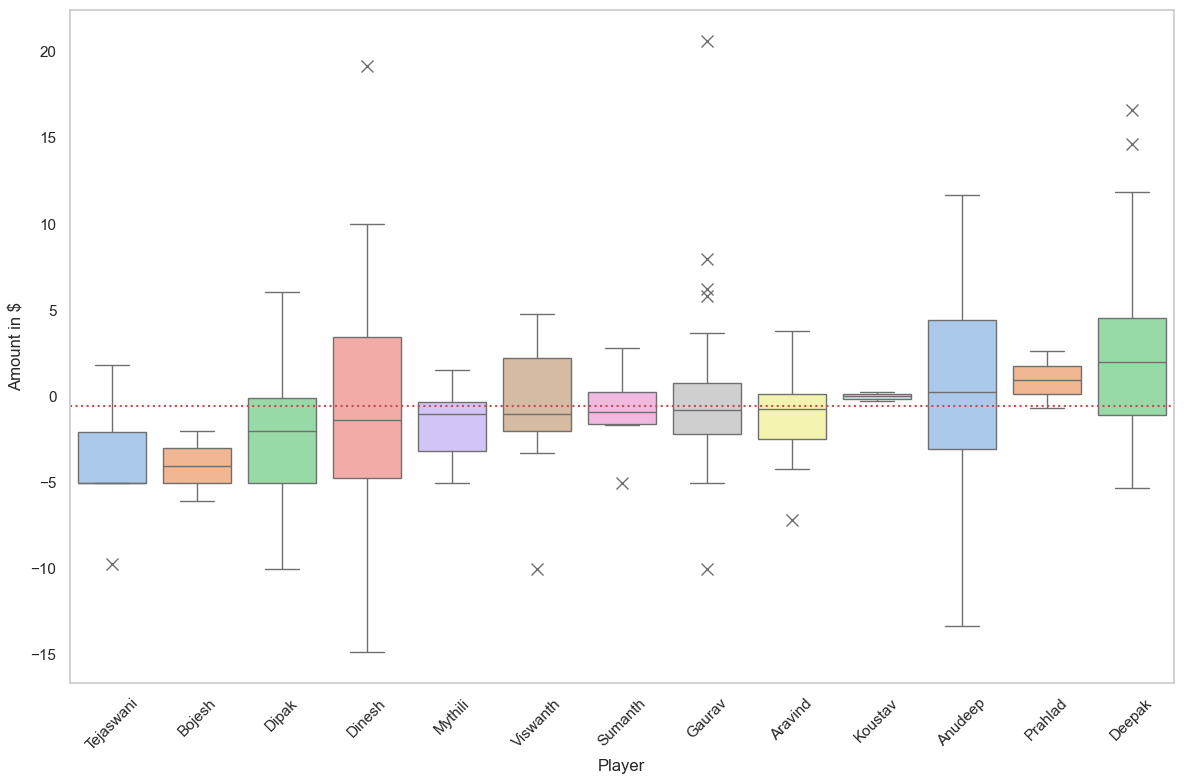

In [173]:
df_long = df_raw.melt(id_vars=['Game'], var_name='Player', value_name='Amount')

order_by_median = df_long.groupby('Player')['Amount'].median().sort_values().index

plt.figure(figsize=(12, 8))
sns.boxplot(data=df_long, x='Player', y='Amount', order=order_by_median, palette='pastel', flierprops=dict(marker='x', markersize=8))

overall_median = df_long['Amount'].median()
plt.axhline(y=overall_median, color='r', linestyle=':', label=f'Overall Median: {overall_median:.2f}')

sns.set_style("whitegrid")

plt.xticks(rotation=45)
# plt.title('Game Scores by Player')
plt.ylabel('Amount in $')
# plt.xlabel('Player')

plt.grid(False)

plt.tight_layout()
plt.show()

/var/folders/7j/qcm64r196nx85pphcp9979y80000gn/T/ipykernel_35779/2036720446.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_long, x='Player', y='Amount', order=sorted_players, palette=player_colors,


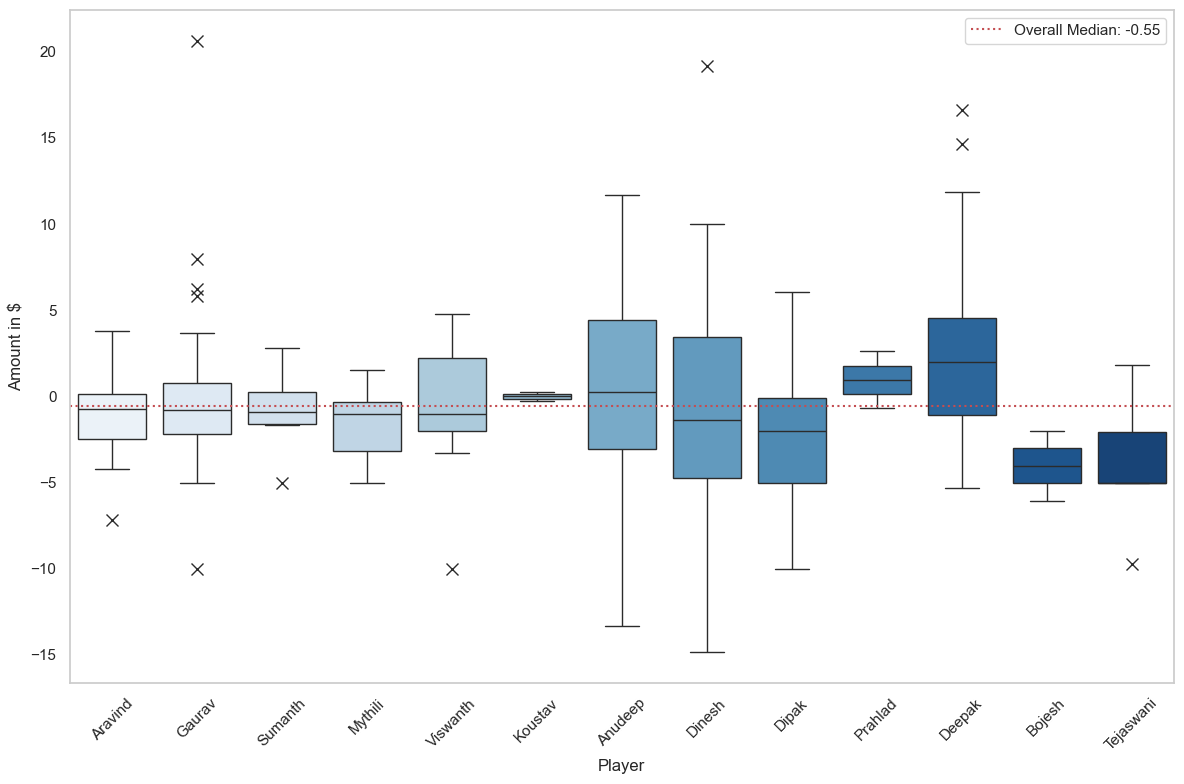

In [198]:
# Melt the DataFrame to long format
df_long = df_raw.melt(id_vars=['Game'], var_name='Player', value_name='Amount')

# Calculate overall median
overall_median = df_long['Amount'].median()

# Calculate absolute differences between each player's median and overall median
player_medians = df_long.groupby('Player')['Amount'].median()
median_diff = abs(player_medians - overall_median)

# Sort players by median differences from least to most
sorted_players = median_diff.sort_values().index

# Create a color palette with sequential coloring based on sorted players
color_palette = sns.color_palette("Blues", n_colors=len(sorted_players))

# Create a dictionary to map players to their colors based on sorting
player_colors = dict(zip(sorted_players, color_palette))

# Create the box plot with custom colors based on sorted players
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_long, x='Player', y='Amount', order=sorted_players, palette=player_colors,
            flierprops=dict(marker='x', markersize=8))

# Plot the overall median as a horizontal line
plt.axhline(y=overall_median, color='r', linestyle=':', label=f'Overall Median: {overall_median:.2f}')

sns.set_style("whitegrid")
plt.xticks(rotation=45)
plt.ylabel('Amount in $')
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.show()